# TensorFlow Datasets

TFDS provides a collection of ready-to-use datasets for use with TensorFlow, Jax, and other Machine Learning frameworks.

It handles downloading and preparing the data deterministically and constructing a `tf.data.Dataset` (or `np.array`).

Note: Do not confuse [TFDS](https://www.tensorflow.org/datasets) (this library) with `tf.data` (TensorFlow API to build efficient data pipelines). TFDS is a high level wrapper around `tf.data`. If you're not familiar with this API, we encourage you to read [the official tf.data guide](https://www.tensorflow.org/guide/data) first.


Copyright 2018 The TensorFlow Datasets Authors, Licensed under the Apache License, Version 2.0

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/datasets/overview"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/datasets/blob/master/docs/overview.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/datasets/docs/overview.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Installation

TFDS exists in two packages:

* `pip install tensorflow-datasets`: The stable version, released every few months.
* `pip install tfds-nightly`: Released every day, contains the last versions of the datasets.

This colab uses `tfds-nightly`:


In [1]:
!pip install -q tfds-nightly tensorflow matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

2022-12-14 12:05:48.219579: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 12:05:48.219686: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 12:05:48.219698: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


## Find available datasets

All dataset builders are subclass of `tfds.core.DatasetBuilder`. To get the list of available builders, use `tfds.list_builders()` or look at our [catalog](https://www.tensorflow.org/datasets/catalog/overview).

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

## Load a dataset

### tfds.load

The easiest way of loading a dataset is `tfds.load`. It will:

1. Download the data and save it as [`tfrecord`](https://www.tensorflow.org/tutorials/load_data/tfrecord) files.
2. Load the `tfrecord` and create the `tf.data.Dataset`.


In [4]:
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


2022-12-14 12:05:52.079335: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Some common arguments:

*   `split=`: Which split to read (e.g. `'train'`, `['train', 'test']`, `'train[80%:]'`,...). See our [split API guide](https://www.tensorflow.org/datasets/splits).
*   `shuffle_files=`: Control whether to shuffle the files between each epoch (TFDS store big datasets in multiple smaller files).
*   `data_dir=`: Location where the dataset is saved (
defaults to `~/tensorflow_datasets/`)
*   `with_info=True`: Returns the `tfds.core.DatasetInfo` containing dataset metadata
*   `download=False`: Disable download


### tfds.builder

`tfds.load` is a thin wrapper around `tfds.core.DatasetBuilder`. You can get the same output using the `tfds.core.DatasetBuilder` API:

In [5]:
builder = tfds.builder('mnist')
# 1. Create the tfrecord files (no-op if already exists)
builder.download_and_prepare()
# 2. Load the `tf.data.Dataset`
ds = builder.as_dataset(split='train', shuffle_files=True)
print(ds)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


### `tfds build` CLI

If you want to generate a specific dataset, you can use the [`tfds` command line](https://www.tensorflow.org/datasets/cli). For example:

```sh
tfds build mnist
```

See [the doc](https://www.tensorflow.org/datasets/cli) for available flags.

## Iterate over a dataset

### As dict

By default, the `tf.data.Dataset` object contains a `dict` of `tf.Tensor`s:

In [6]:
ds = tfds.load('mnist', split='train')
ds = ds.take(1)  # Only take a single example

for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  label = example["label"]
  print(image.shape, label)

['image', 'label']
(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


2022-12-14 12:05:53.963119: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


To find out the `dict` key names and structure, look at the dataset documentation in [our catalog](https://www.tensorflow.org/datasets/catalog/overview#all_datasets). For example: [mnist documentation](https://www.tensorflow.org/datasets/catalog/mnist).

### As tuple (`as_supervised=True`)

By using `as_supervised=True`, you can get a tuple `(features, label)` instead for supervised datasets.

In [7]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in ds:  # example is (image, label)
  print(image.shape, label)

(28, 28, 1) tf.Tensor(4, shape=(), dtype=int64)


2022-12-14 12:05:54.894618: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### As numpy (`tfds.as_numpy`)

Uses `tfds.as_numpy` to convert:

*   `tf.Tensor` -> `np.array`
*   `tf.data.Dataset` -> `Iterator[Tree[np.array]]` (`Tree` can be arbitrary nested `Dict`, `Tuple`)



In [8]:
ds = tfds.load('mnist', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in tfds.as_numpy(ds):
  print(type(image), type(label), label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 4


2022-12-14 12:05:56.757812: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### As batched tf.Tensor (`batch_size=-1`)

By using `batch_size=-1`, you can load the full dataset in a single batch.

This can be combined with `as_supervised=True` and `tfds.as_numpy` to get the the data as `(np.array, np.array)`:


In [9]:
image, label = tfds.as_numpy(tfds.load(
    'mnist',
    split='test',
    batch_size=-1,
    as_supervised=True,
))

print(type(image), image.shape)

<class 'numpy.ndarray'> (10000, 28, 28, 1)


Be careful that your dataset can fit in memory, and that all examples have the same shape.

## Benchmark your datasets

Benchmarking a dataset is a simple `tfds.benchmark` call on any iterable (e.g. `tf.data.Dataset`, `tfds.as_numpy`,...).


In [10]:
ds = tfds.load('mnist', split='train')
ds = ds.batch(32).prefetch(1)

tfds.benchmark(ds, batch_size=32)
tfds.benchmark(ds, batch_size=32)  # Second epoch much faster due to auto-caching


************ Summary ************



Examples/sec (First included) 45019.93 ex/sec (total: 60032 ex, 1.33 sec)
Examples/sec (First only) 90.50 ex/sec (total: 32 ex, 0.35 sec)
Examples/sec (First excluded) 61233.30 ex/sec (total: 60000 ex, 0.98 sec)

************ Summary ************



Examples/sec (First included) 187478.81 ex/sec (total: 60032 ex, 0.32 sec)
Examples/sec (First only) 2745.30 ex/sec (total: 32 ex, 0.01 sec)
Examples/sec (First excluded) 194457.60 ex/sec (total: 60000 ex, 0.31 sec)


,duration,num_examples,avg
first+lasts,0.320207,60032,187478.809596
first,0.011656,32,2745.296535
lasts,0.308551,60000,194457.598691


* Do not forget to normalize the results per batch size with the `batch_size=` kwarg.
* In the summary, the first warmup batch is separated from the other ones to capture `tf.data.Dataset` extra setup time (e.g. buffers initialization,...).
* Notice how the second iteration is much faster due to [TFDS auto-caching](https://www.tensorflow.org/datasets/performances#auto-caching).
* `tfds.benchmark` returns a `tfds.core.BenchmarkResult` which can be inspected for further analysis.

### Build end-to-end pipeline

To go further, you can look:

*   Our [end-to-end Keras example](https://www.tensorflow.org/datasets/keras_example) to see a full training pipeline (with batching, shuffling,...).
*   Our [performance guide](https://www.tensorflow.org/datasets/performances) to improve the speed of your pipelines (tip: use `tfds.benchmark(ds)` to benchmark your datasets).


## Visualization

### tfds.as_dataframe

`tf.data.Dataset` objects can be converted to [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with `tfds.as_dataframe` to be visualized on [Colab](https://colab.research.google.com).

* Add the `tfds.core.DatasetInfo` as second argument of `tfds.as_dataframe` to visualize images, audio, texts, videos,...
* Use `ds.take(x)` to only display the first `x` examples. `pandas.DataFrame` will load the full dataset in-memory, and can be very expensive to display.

In [11]:
ds, info = tfds.load('mnist', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)

2022-12-14 12:06:00.782816: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


,image,label
0,,4
1,,1
2,,0
3,,7


### tfds.show_examples

`tfds.show_examples` returns a `matplotlib.figure.Figure` (only image datasets supported now):

2022-12-14 12:06:01.996651: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


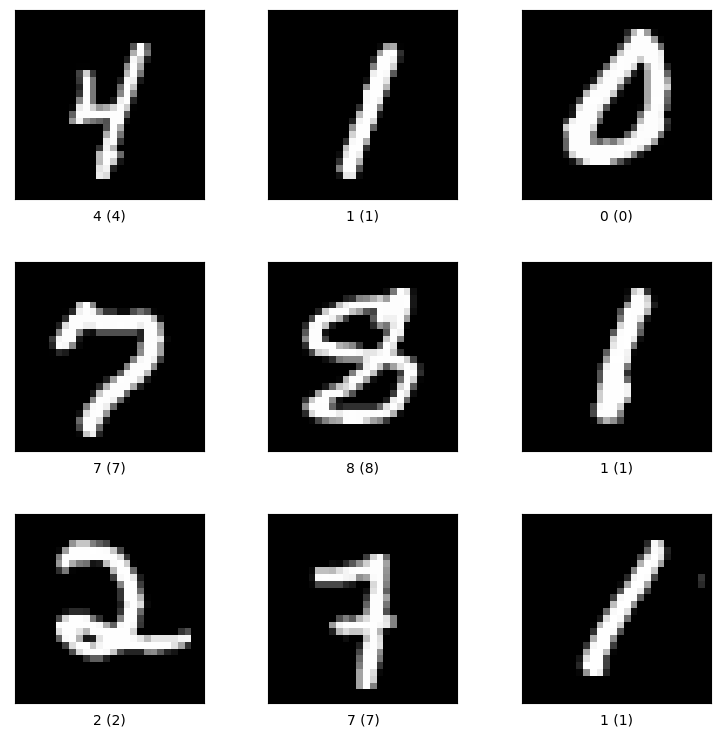

In [12]:
ds, info = tfds.load('mnist', split='train', with_info=True)

fig = tfds.show_examples(ds, info)

## Access the dataset metadata

All builders include a `tfds.core.DatasetInfo` object containing the dataset metadata.

It can be accessed through:

*   The `tfds.load` API:


In [13]:
ds, info = tfds.load('mnist', with_info=True)

*   The `tfds.core.DatasetBuilder` API:

In [14]:
builder = tfds.builder('mnist')
info = builder.info

The dataset info contains additional informations about the dataset (version, citation, homepage, description,...).

In [15]:
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='gs://tensorflow-datasets/datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)


### Features metadata (label names, image shape,...)

Access the `tfds.features.FeatureDict`:

In [16]:
info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

Number of classes, label names:

In [17]:
print(info.features["label"].num_classes)
print(info.features["label"].names)
print(info.features["label"].int2str(7))  # Human readable version (8 -> 'cat')
print(info.features["label"].str2int('7'))

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
7
7


Shapes, dtypes:

In [18]:
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].dtype)

{'image': (28, 28, 1), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(28, 28, 1)
<dtype: 'uint8'>


### Split metadata (e.g. split names, number of examples,...)

Access the `tfds.core.SplitDict`:

In [19]:
print(info.splits)

{'test': <SplitInfo num_examples=10000, num_shards=1>, 'train': <SplitInfo num_examples=60000, num_shards=1>}


Available splits:

In [20]:
print(list(info.splits.keys()))

['test', 'train']


Get info on individual split:

In [21]:
print(info.splits['train'].num_examples)
print(info.splits['train'].filenames)
print(info.splits['train'].num_shards)

60000
['mnist-train.tfrecord-00000-of-00001']
1


It also works with the subsplit API:

In [22]:
print(info.splits['train[15%:75%]'].num_examples)
print(info.splits['train[15%:75%]'].file_instructions)

36000
[FileInstruction(filename='gs://tensorflow-datasets/datasets/mnist/3.0.1/mnist-train.tfrecord-00000-of-00001', skip=9000, take=36000, num_examples=36000)]


## Troubleshooting

### Manual download (if download fails)

If download fails for some reason (e.g. offline,...). You can always manually download the data yourself and place it in the `manual_dir` (defaults to `~/tensorflow_datasets/downloads/manual/`.

To find out which urls to download, look into:

 * For new datasets (implemented as folder): [`tensorflow_datasets/`](https://github.com/tensorflow/datasets/tree/master/tensorflow_datasets/)`<type>/<dataset_name>/checksums.tsv`. For example: [`tensorflow_datasets/text/bool_q/checksums.tsv`](https://github.com/tensorflow/datasets/blob/master/tensorflow_datasets/text/bool_q/checksums.tsv).

   You can find the dataset source location in [our catalog](https://www.tensorflow.org/datasets/catalog/overview).
 * For old datasets: [`tensorflow_datasets/url_checksums/<dataset_name>.txt`](https://github.com/tensorflow/datasets/tree/master/tensorflow_datasets/url_checksums)

### Fixing `NonMatchingChecksumError`

TFDS ensure determinism by validating the checksums of downloaded urls.
If `NonMatchingChecksumError` is raised, might indicate:

  * The website may be down (e.g. `503 status code`). Please check the url.
  * For Google Drive URLs, try again later as Drive sometimes rejects downloads when too many people access the same URL. See [bug](https://github.com/tensorflow/datasets/issues/1482)
  * The original datasets files may have been updated. In this case the TFDS dataset builder should be updated. Please open a new Github issue or PR:
     * Register the new checksums with `tfds build --register_checksums`
     * Eventually update the dataset generation code.
     * Update the dataset `VERSION`
     * Update the dataset `RELEASE_NOTES`: What caused the checksums to change ? Did some examples changed ?
     * Make sure the dataset can still be built.
     * Send us a PR

Note: You can also inspect the downloaded file in `~/tensorflow_datasets/download/`.


## Citation

If you're using `tensorflow-datasets` for a paper, please include the following citation, in addition to any citation specific to the used datasets (which can be found in the [dataset catalog](https://www.tensorflow.org/datasets/catalog/overview)).

```
@misc{TFDS,
  title = { {TensorFlow Datasets}, A collection of ready-to-use datasets},
  howpublished = {\url{https://www.tensorflow.org/datasets}},
}
```